In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [15]:
img = cv2.imread('datasets/hw3.jpg')

In [9]:
img.shape

(448, 384, 3)

[]

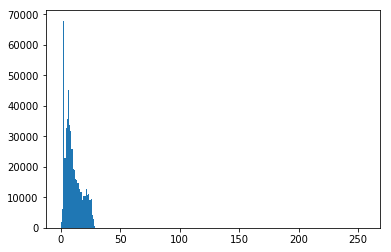

In [14]:
plt.hist(img.ravel(), 256, [0, 256])
plt.plot()